In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import pandas_profiling as pdp
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


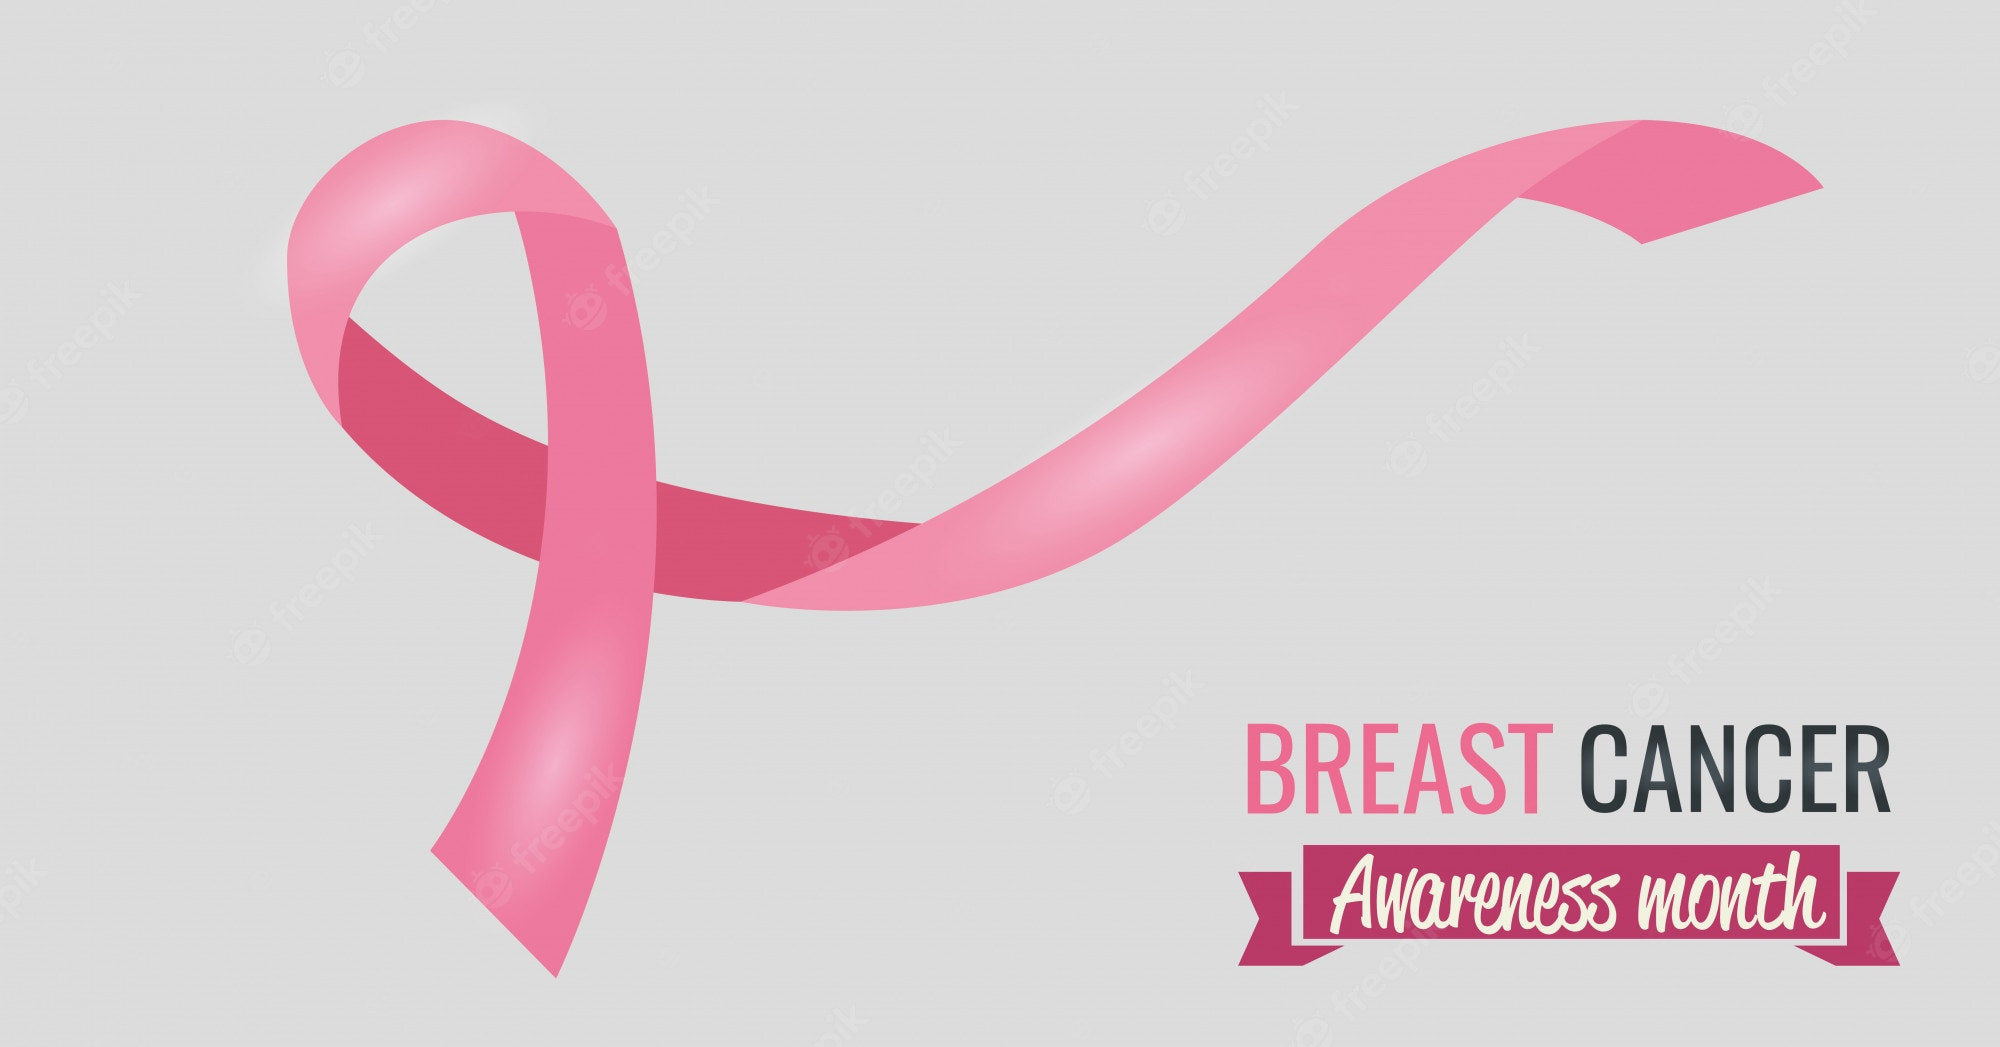

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer.

Breast cancer can begin in different parts of the breast. A breast is made up of three main parts: lobules, ducts, and connective tissue. The lobules are the glands that produce milk. The ducts are tubes that carry milk to the nipple. The connective tissue (which consists of fibrous and fatty tissue) surrounds and holds everything together. Most breast cancers begin in the ducts or lobules.

Breast cancer can spread outside the breast through blood vessels and lymph vessels. When breast cancer spreads to other parts of the body, it is said to have metastasized.



In [2]:
#فراخوانی دیتاست و تبدیلش به دیتافریم رو میشه اینجوری در یک خط نوشت
# Calling the dataset and converting it to a data frame can be written in one line like this


df=pd.DataFrame(pd.read_csv('../input/breast-cancer/Breast_Cancer.csv'))
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [3]:
# این فانکشن برای آن است که ما عنوان ستون ، تایپ آن و داده های یونیک و میزان میسینگ ولیو را مشاهده کنیم
# This function is for us to see the title of the column, its type and unique data and the amount of missing value.


def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [4]:
check(df)


,column,dtypes,nunique,sum_null
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size,int64,110,0


# EDA

In [5]:
# با این فانکشن سعی میکنیم یه پلات از تمام فیچرهای دیتافریم ترسیم کنیم تا دید بهتری داشته باشیم
# With this function, we try to draw a plot of all data frame features to have a better view


def fig (df,var):
    fig2 = px.histogram(df,x=var,color=var,template='plotly_dark')
    fig2.show()

In [6]:
for i in df.columns:
    fig (df,i)

In [7]:
#با این پلات ما میخوایم تمام فیچرها رو با توجه به اینکه زنده مانده اند یا خیر بررسی کنیم
#With this function, we want to check all the features according to whether they are alive or not


def countplot (df,var):  
    sns.countplot(data=df,x=var,hue='Status')
    sns.set(rc={'figure.figsize':(20,15)})
    plt.xticks(rotation=90)
    plt.show()

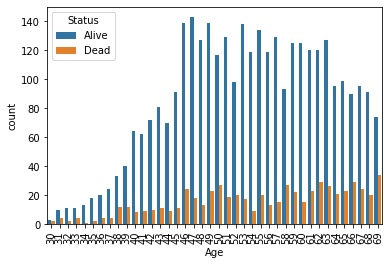

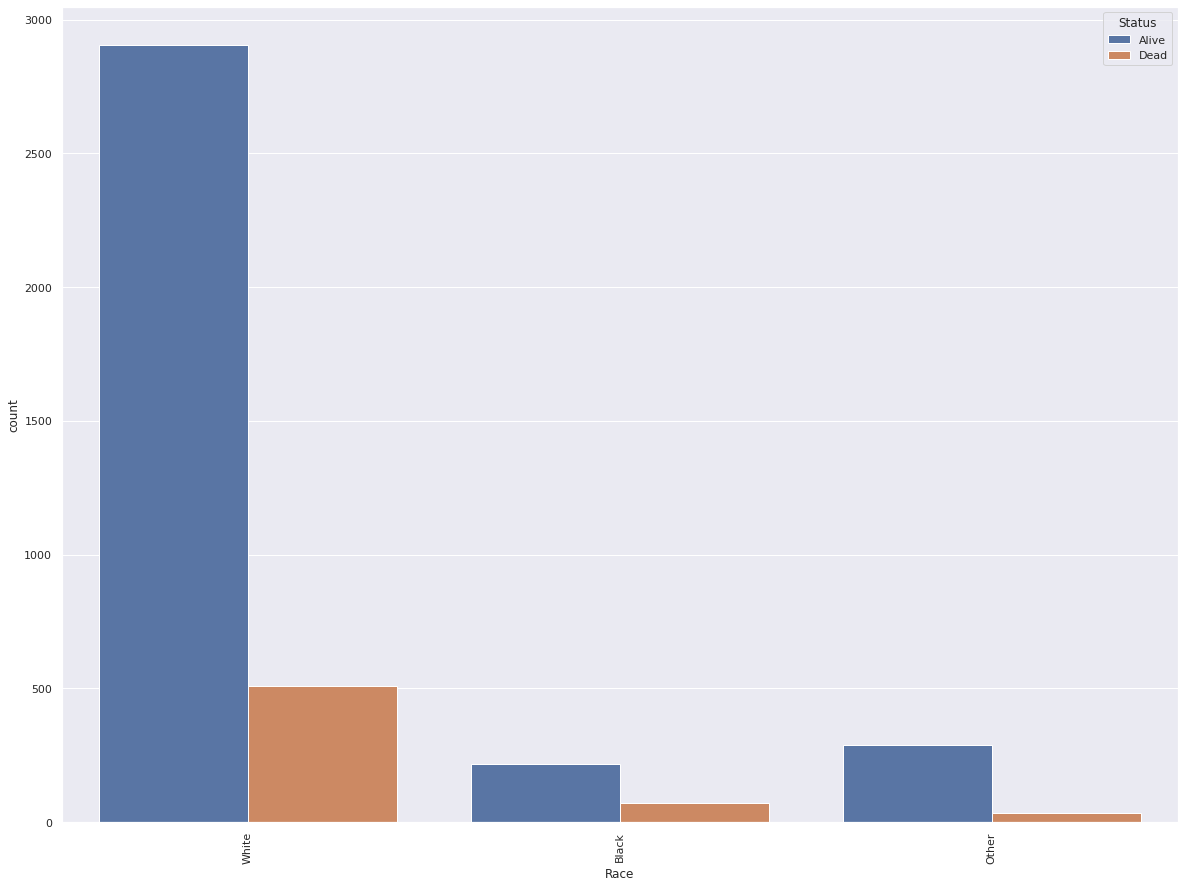

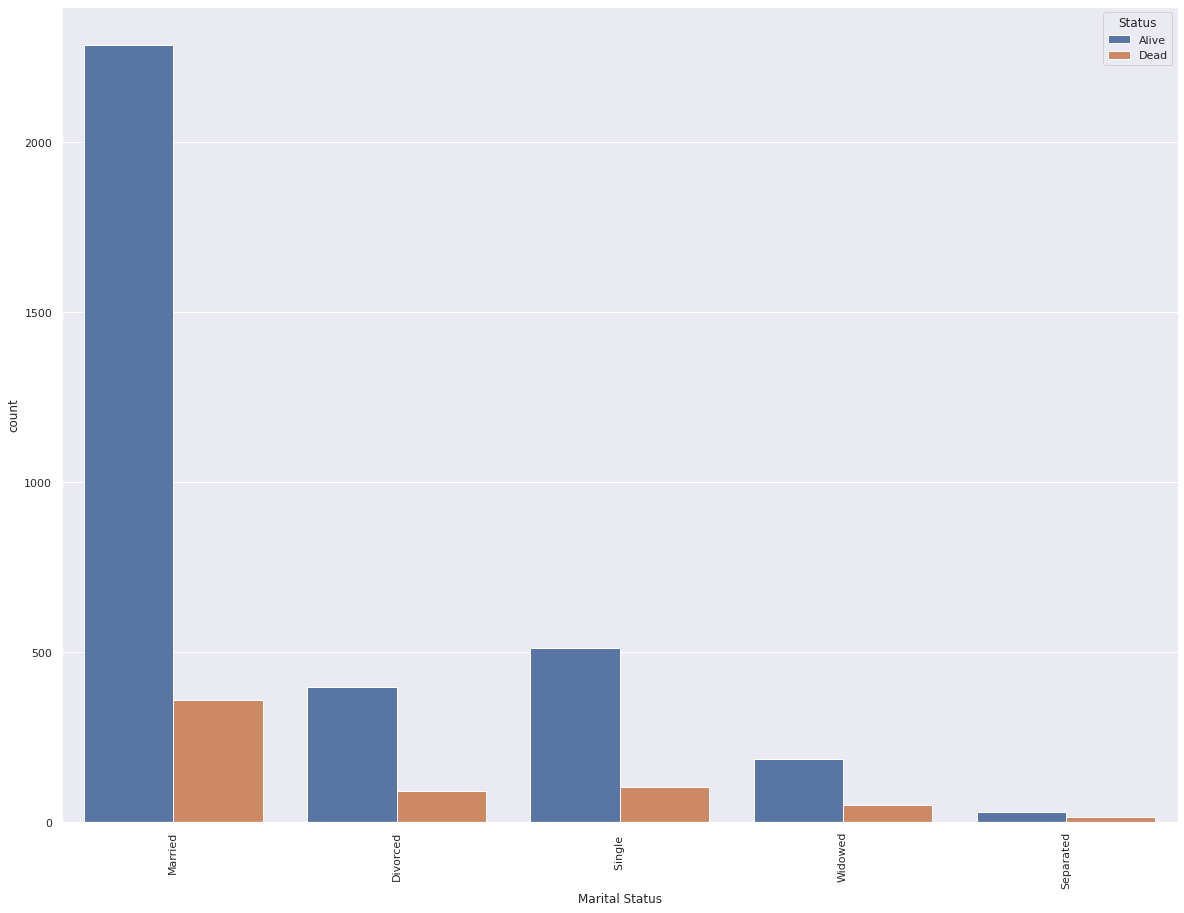

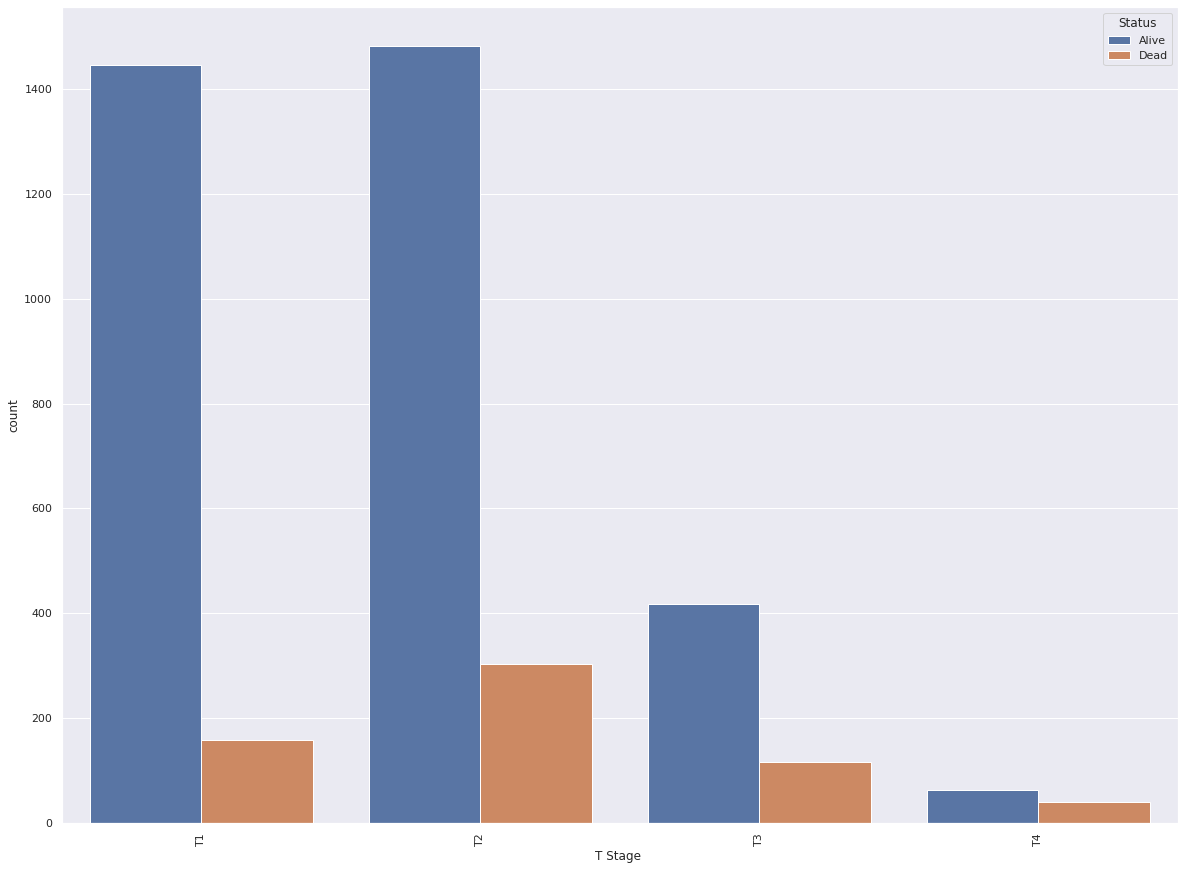

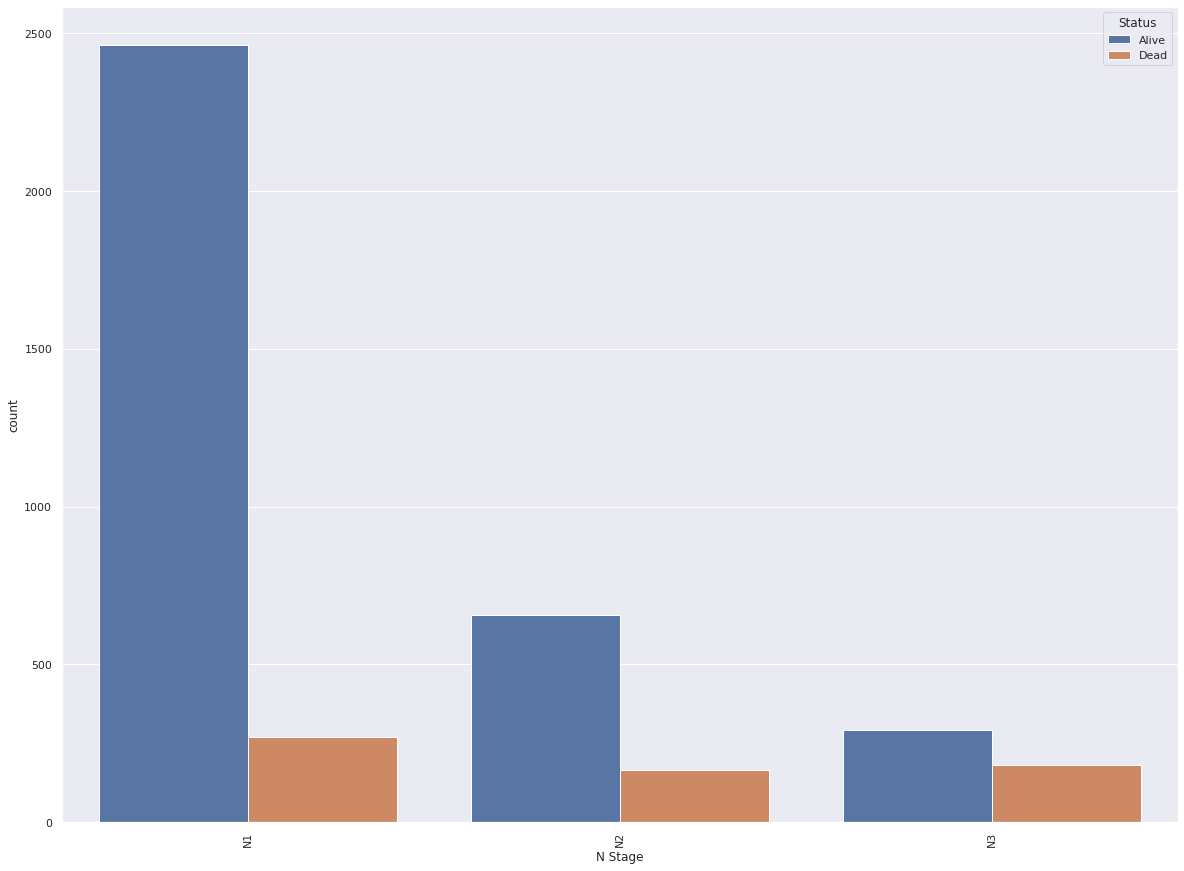

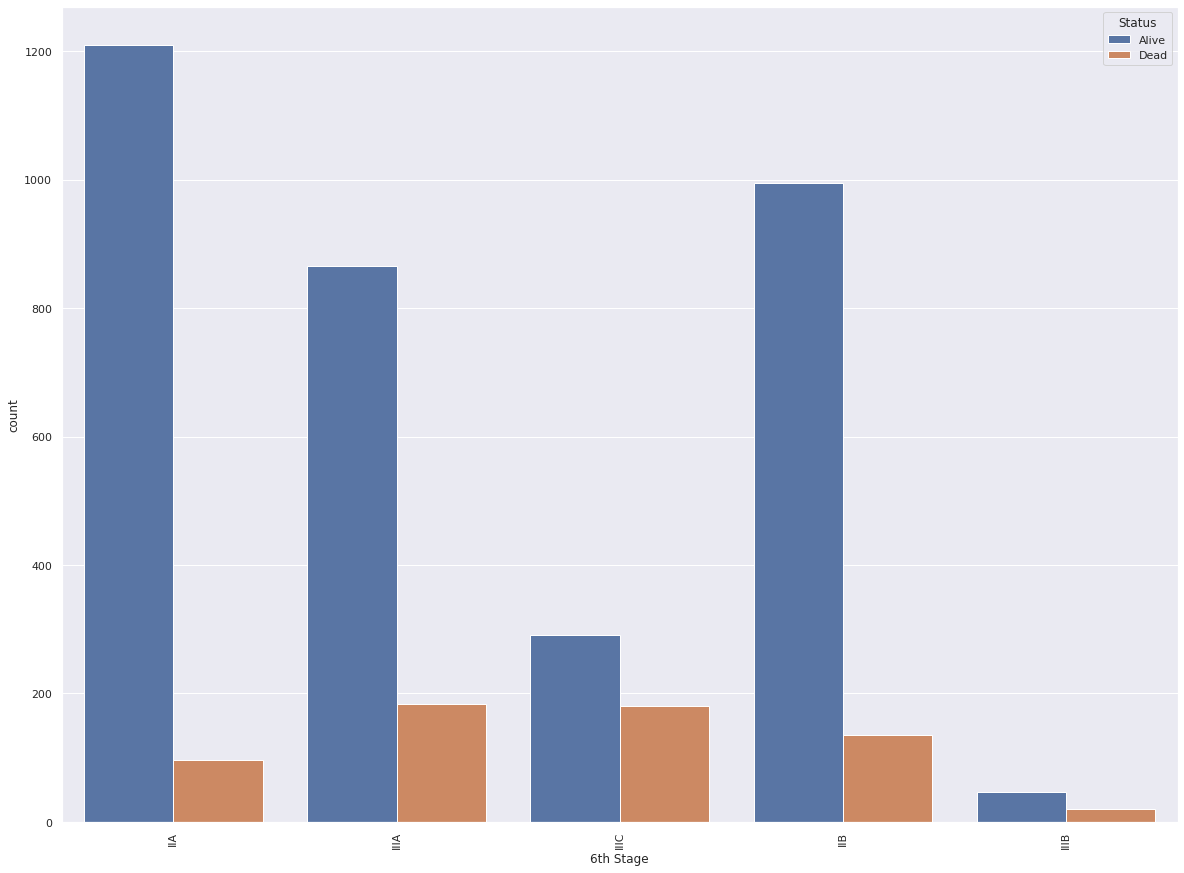

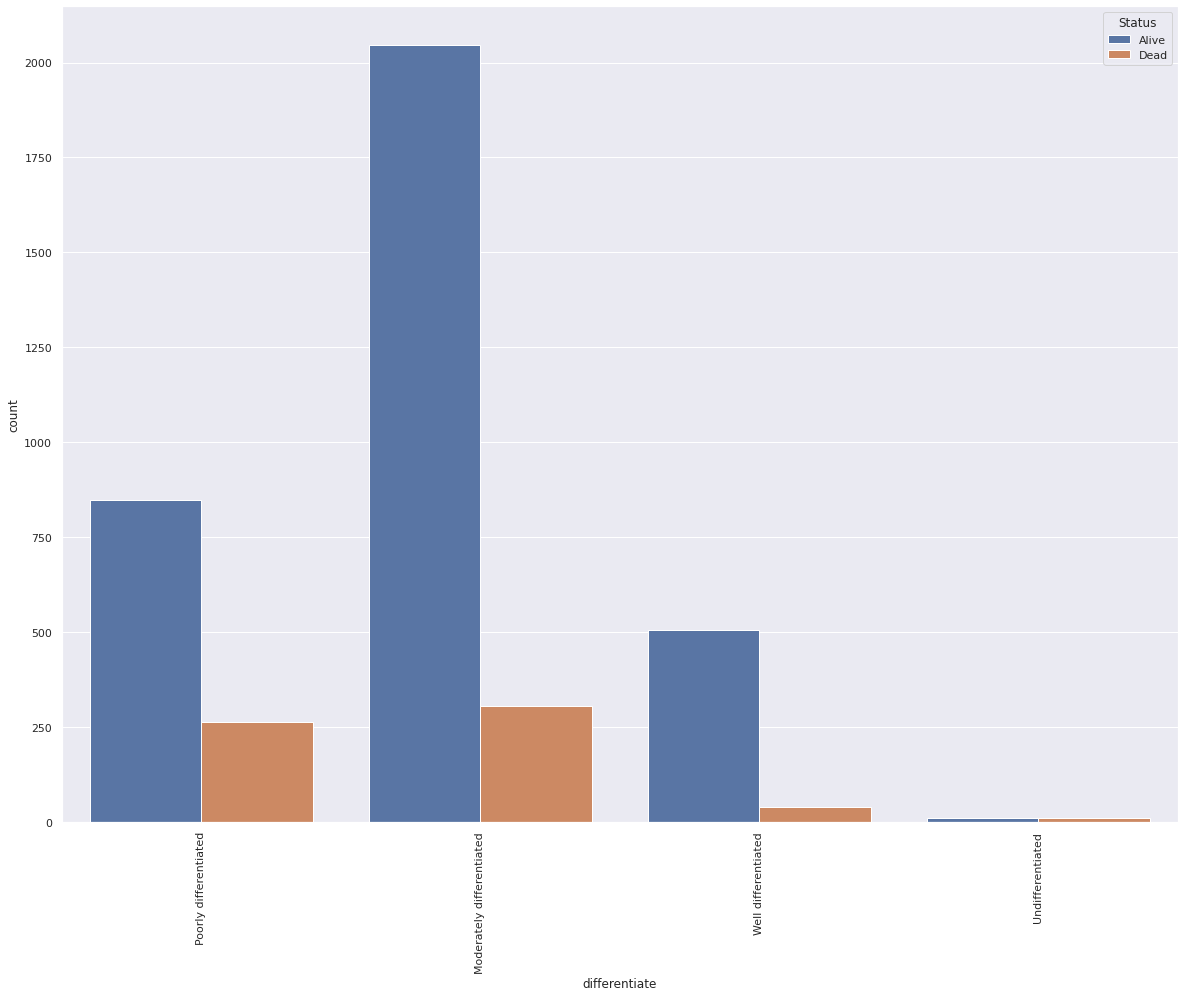

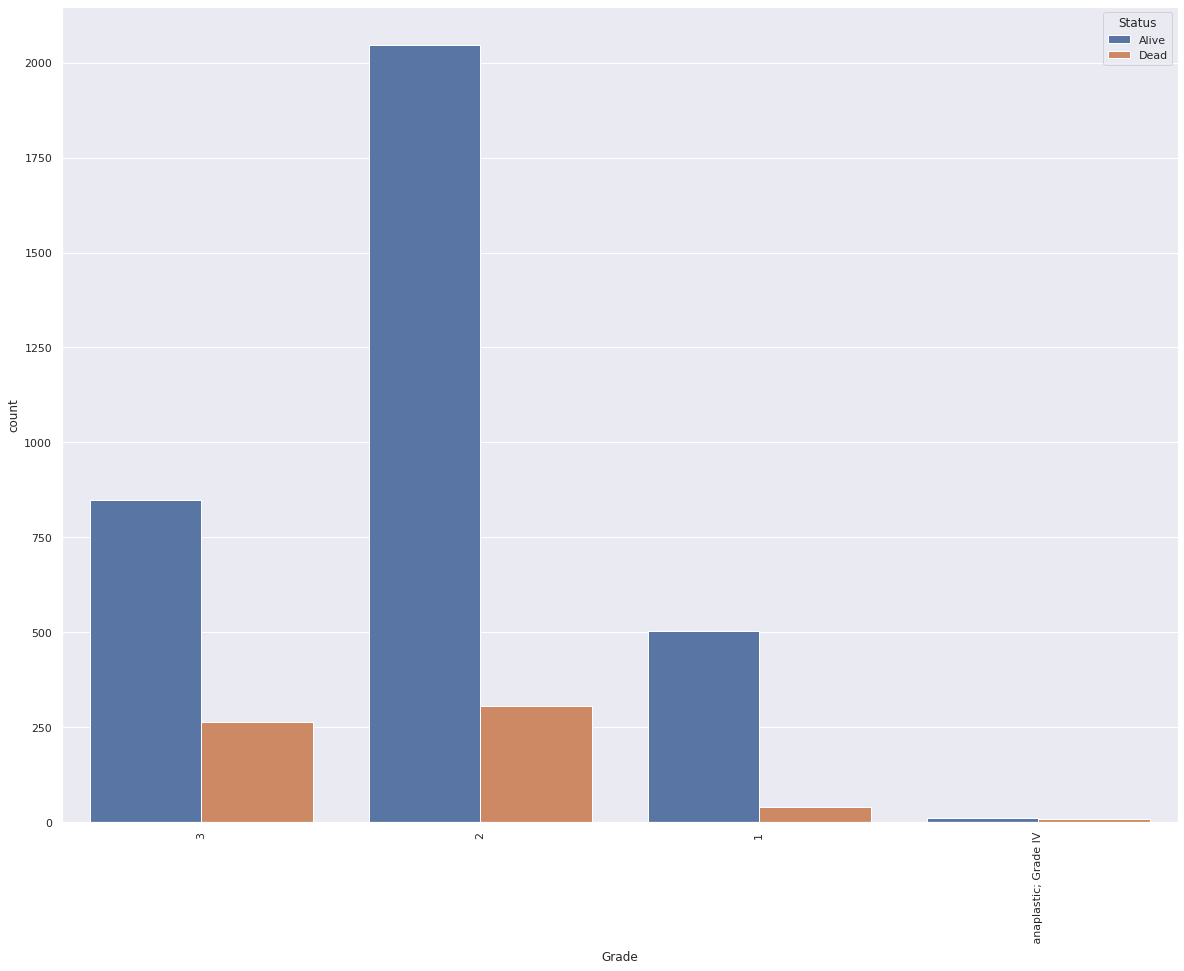

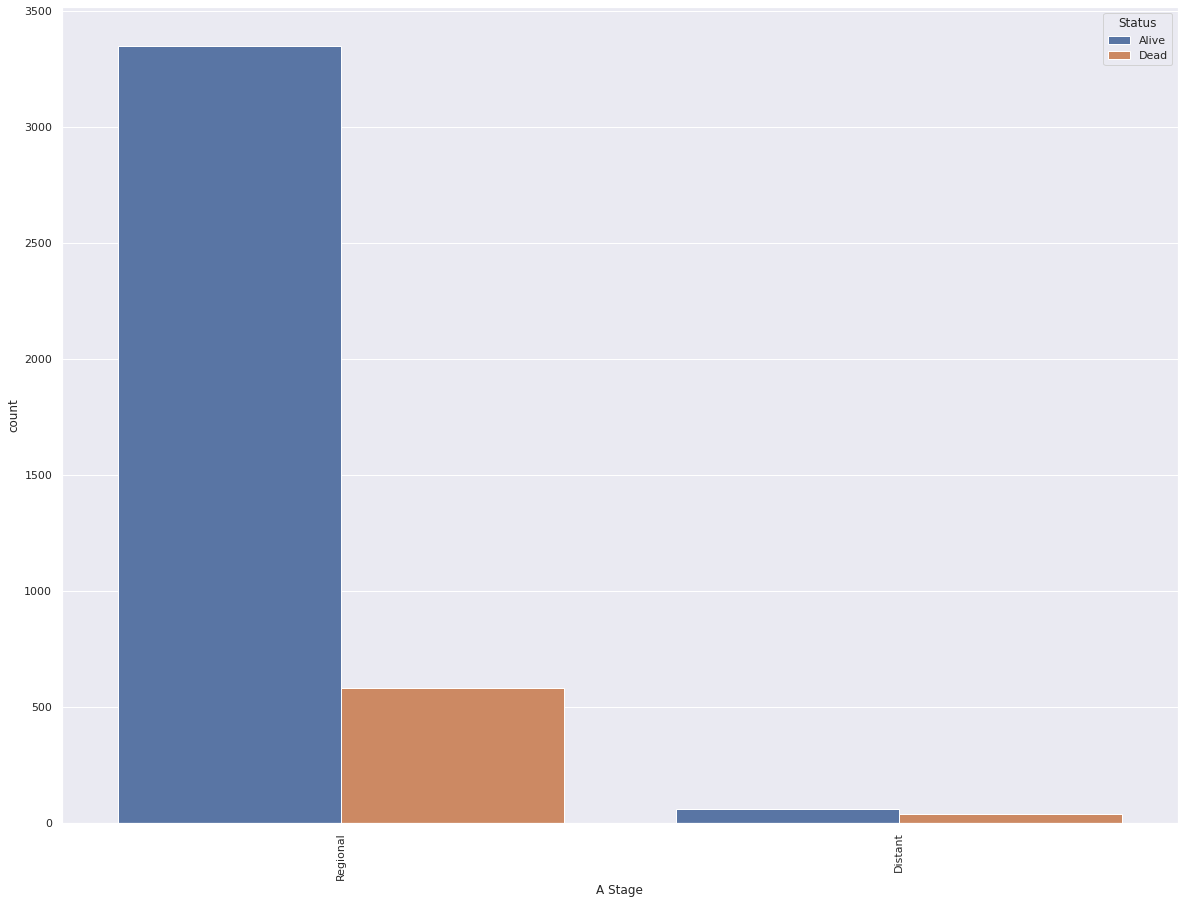

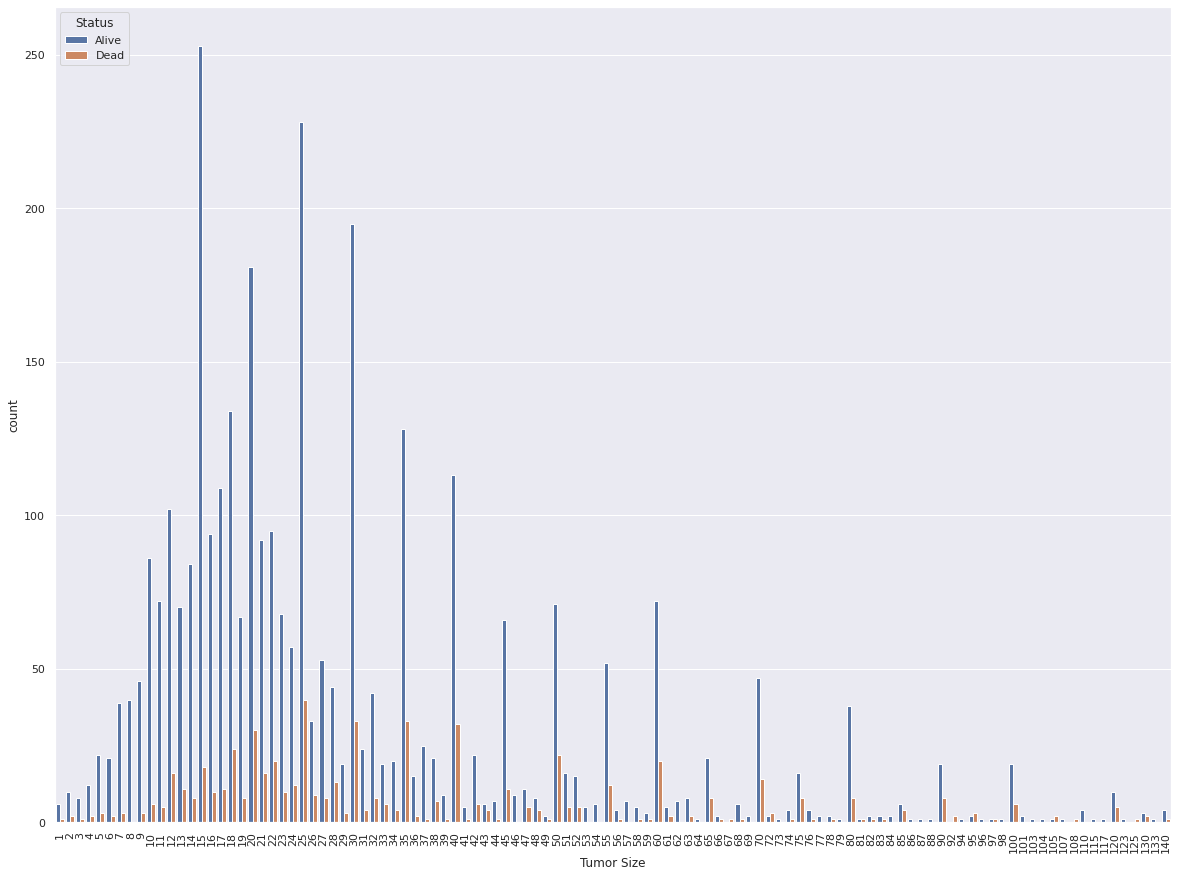

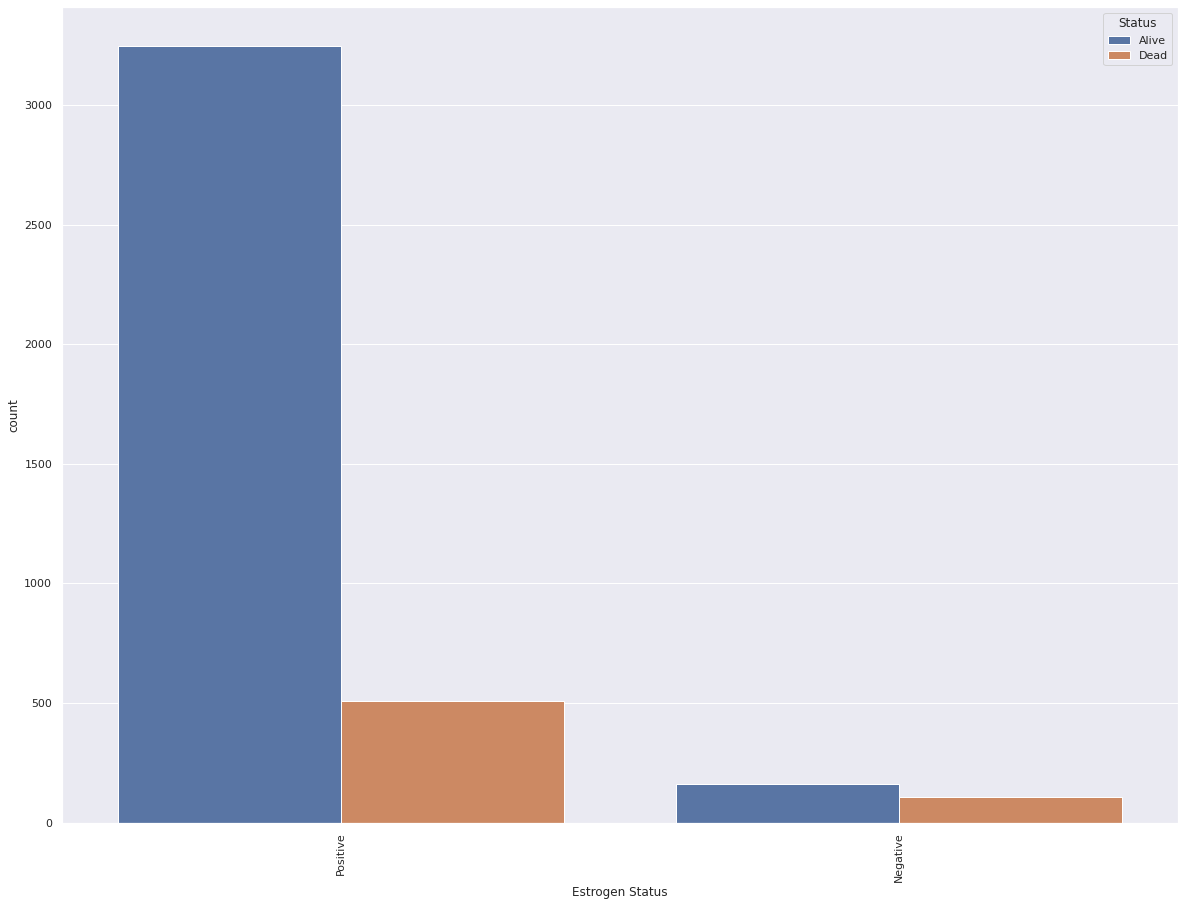

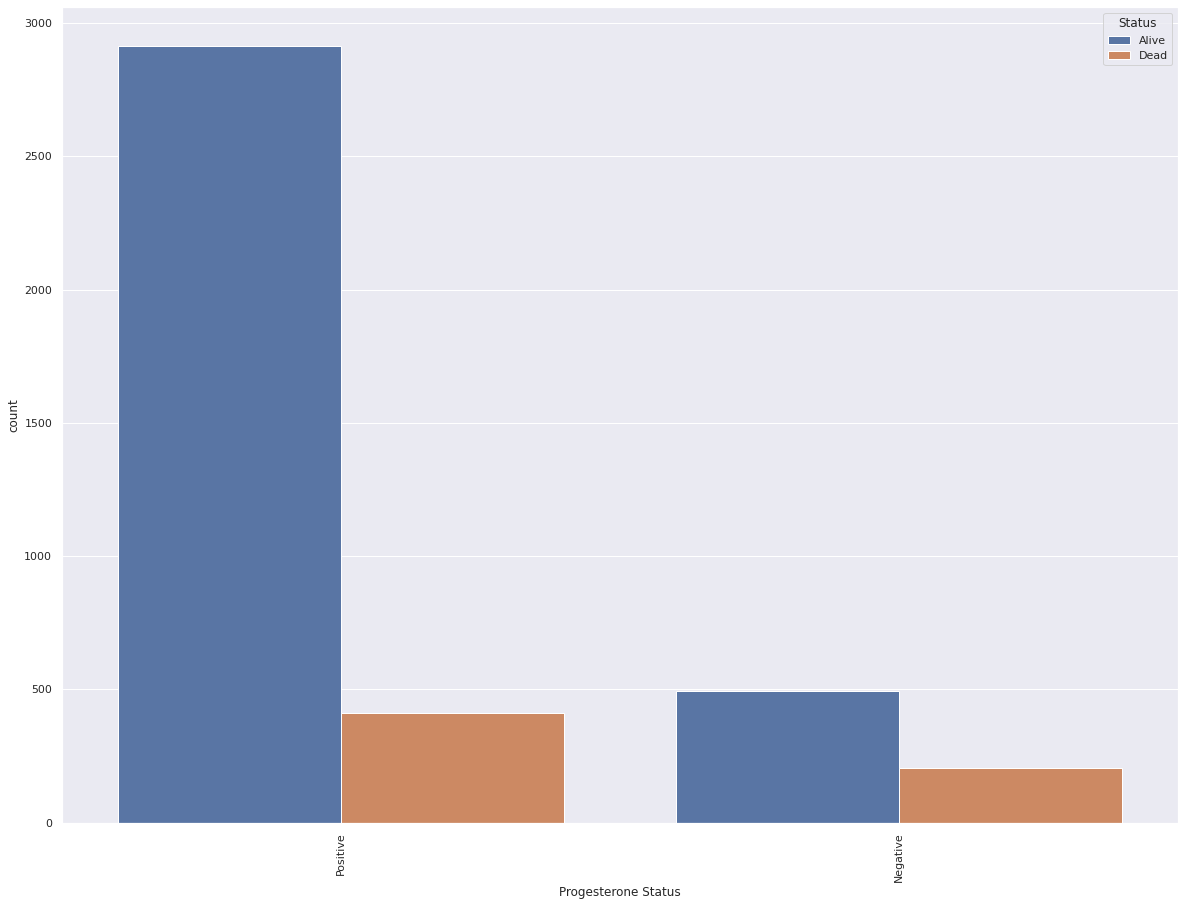

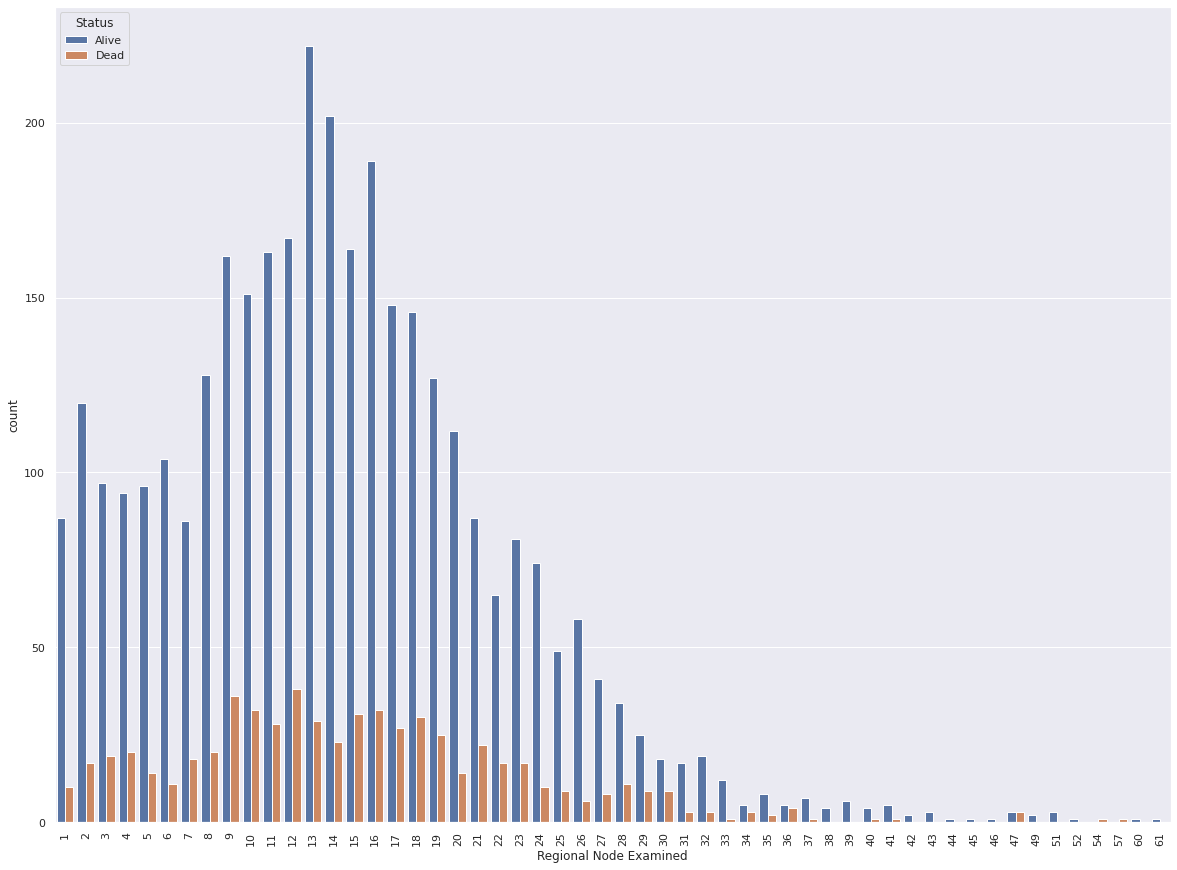

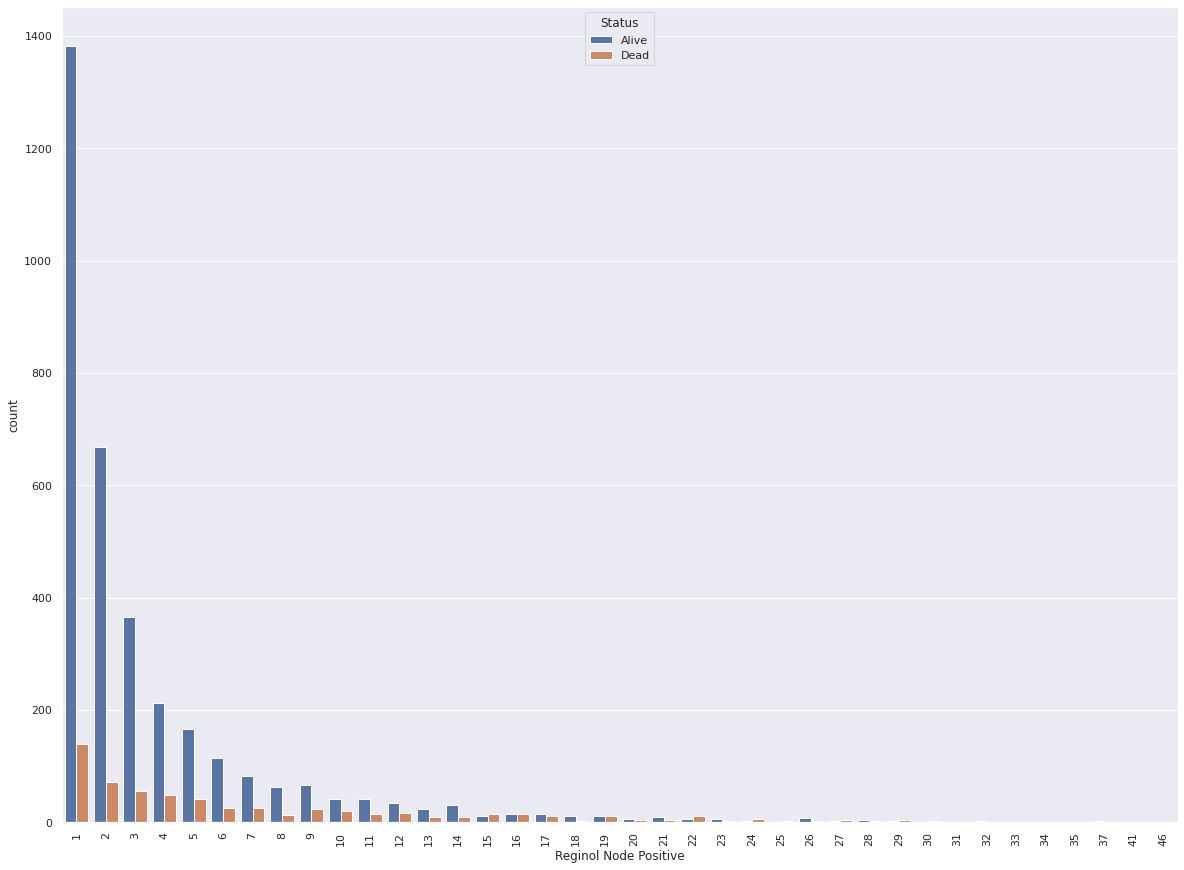

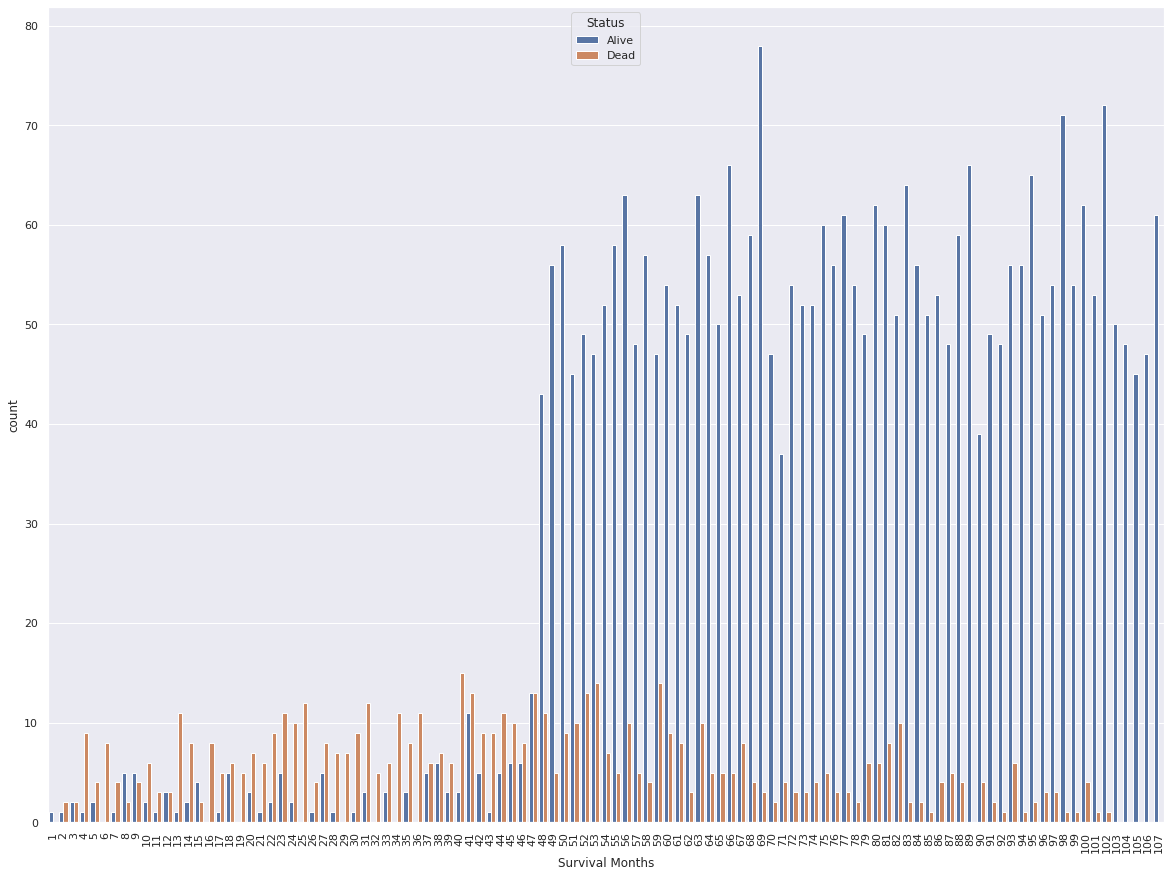

In [8]:
dfc=df.drop('Status',axis=1)
for i in dfc.columns:
    countplot (df,i)

In [9]:
#در اینجا یک کپی از دیتافریم اولی گرفتیم
# Here we took a copy of the first dataframe


df1=df.copy()


#میخوایم مقادیر غیر عددی هر ستون رو تبدیل به عدد کنیم تا قابل پردازش باشه
# We want to convert the non-numeric values of each column into numbers so that it can be processed

le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
df1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


In [10]:
#این برای گرفتن یه شماتیک کلی از داده های خود هست
# This is to get a general schematic of your data


temp = df1.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,23.972167,1.775845,1.371272,0.784791,0.438370,1.321819,0.690358,2.131710,0.977137,29.226392,0.933151,0.826541,13.349155,3.154573,70.297962,0.153082
std,8.963134,0.564465,1.063637,0.765531,0.693479,1.266624,1.016418,0.642398,0.149485,20.207811,0.249791,0.378691,8.060677,5.084615,22.921430,0.360111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,15.000000,1.000000,1.000000,8.000000,0.000000,55.000000,0.000000
50%,24.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,24.000000,1.000000,1.000000,13.000000,1.000000,72.000000,0.000000
75%,31.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,37.000000,1.000000,1.000000,18.000000,4.000000,89.000000,0.000000
max,39.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,109.000000,1.000000,1.000000,53.000000,37.000000,106.000000,1.000000


<AxesSubplot:>

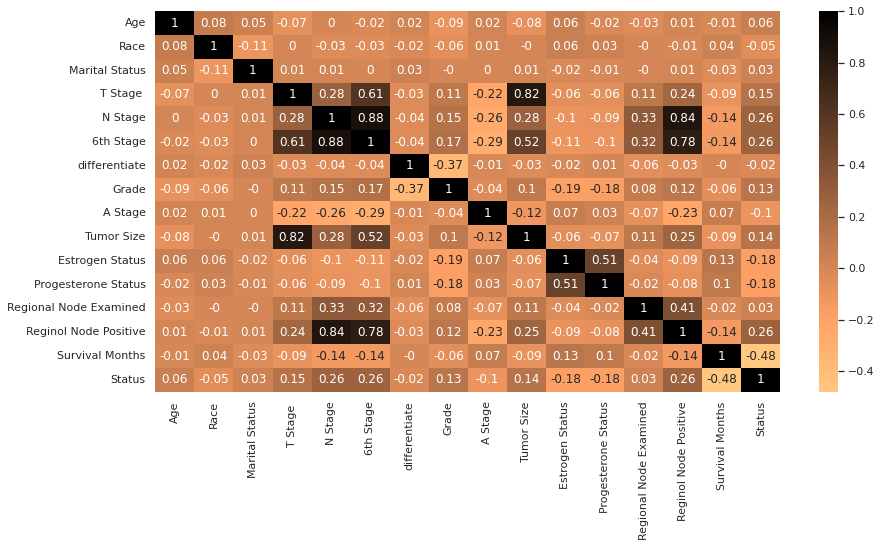

In [11]:
#این بخش برای نمایش رابطه و کرولیشن بین فیچرها استفاده میشود تا بفهمیم کدام فیچر بر روی دیگری بیشترین تاثیر را دارد
# This section is used to show the relationship and correlation between features to understand which feature has the most impact on the other

correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'copper_r')

# Model Selection:

In [12]:
df2=df1.copy()
y=df2.pop('Status').values
X=df2.values

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

# Random Forest:

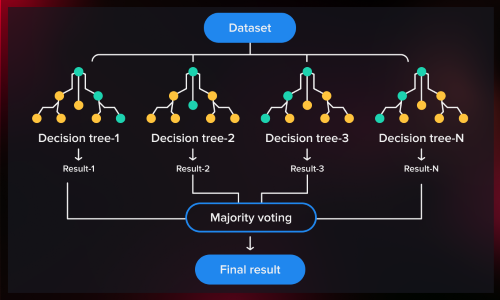

In [14]:
rfmodel=RandomForestClassifier(n_estimators=600)

In [15]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [16]:
y_pred=rfmodel.predict(X_test)

In [17]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('jaccard_score: ',jaccard_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9205955334987593
recall_score:  0.4909090909090909
jaccard_score:  0.4576271186440678
f1_score:  0.627906976744186
precision_score:  0.8709677419354839


# SVM:

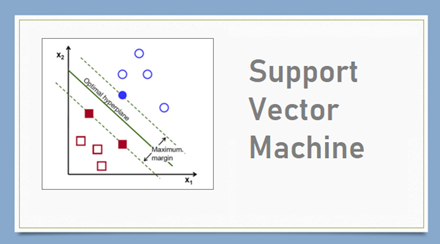

In [18]:
# With rbf Kernel

svcmodel=SVC(kernel='rbf',C=10)
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9255583126550868
recall_score:  0.4909090909090909
jaccard_score:  0.47368421052631576
f1_score:  0.6428571428571428
precision_score:  0.9310344827586207


In [19]:
# With linear Kernel

svcmodel=SVC(kernel='linear')
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9230769230769231
recall_score:  0.509090909090909
jaccard_score:  0.4745762711864407
f1_score:  0.6436781609195402
precision_score:  0.875


In [20]:
# With poly Kernel


svcmodel=SVC(kernel='poly',degree=2,C=10)
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9181141439205955
recall_score:  0.41818181818181815
jaccard_score:  0.4107142857142857
f1_score:  0.5822784810126582
precision_score:  0.9583333333333334


In [21]:
# With sigmoid Kernel


svcmodel=SVC(kernel='sigmoid')
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.7965260545905707
recall_score:  0.2727272727272727
jaccard_score:  0.15463917525773196
f1_score:  0.26785714285714285
precision_score:  0.2631578947368421


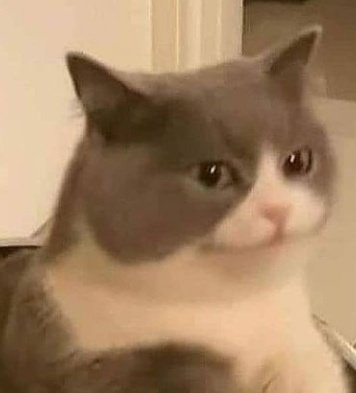